In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,
                             average_precision_score, precision_recall_curve, roc_curve,
                             confusion_matrix, classification_report)

In [ ]:
import joblib

# Load trained models
log_reg = joblib.load("../models/log_reg.pkl")
dt = joblib.load("../models/dt.pkl")
rf = joblib.load("../models/rf.pkl")
svm = joblib.load("../models/svm.pkl")
gb = joblib.load("../models/gb.pkl")

# Load test data
X_test_clean = joblib.load("../models/X_test_clean.pkl")
y_test = joblib.load("../models/y_test.pkl")

print("Models and test data loaded successfully!")
print(f"Test set size: {X_test_clean.shape}")
print(f"Test label distribution:\n{y_test.value_counts()}")

Models and test data loaded successfully!
Test set size: (1826, 15)
Test label distribution:
_label_encoded
0    981
1    845
Name: count, dtype: int64


In [ ]:
def evaluate(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{'='*60}")
    print(f"{model_name} Evaluation")
    print(f"{'='*60}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")
    print(f"PR-AUC:    {average_precision_score(y_test, y_prob):.4f}")
    print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"\n{classification_report(y_test, y_pred)}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    axes[0].plot(fpr, tpr)
    axes[0].set_title(f"ROC Curve — {model_name}")
    axes[0].set_xlabel("FPR"); axes[0].set_ylabel("TPR")

    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    axes[1].plot(rec, prec)
    axes[1].set_title(f"PR Curve — {model_name}")
    axes[1].set_xlabel("Recall"); axes[1].set_ylabel("Precision")

    plt.tight_layout()
    plt.show()


Logistic Regression Evaluation
Precision: 0.8645
Recall:    0.8757
F1 Score:  0.8701
ROC-AUC:   0.9552
PR-AUC:    0.9424

Confusion Matrix:
[[865 116]
 [105 740]]

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       981
           1       0.86      0.88      0.87       845

    accuracy                           0.88      1826
   macro avg       0.88      0.88      0.88      1826
weighted avg       0.88      0.88      0.88      1826



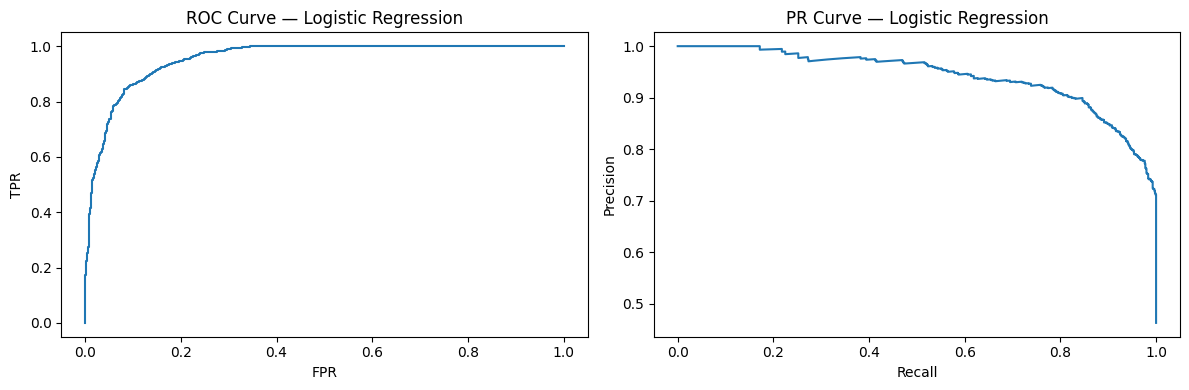

In [52]:
evaluate(log_reg, X_test_clean, y_test, "Logistic Regression")


Decision Tree Evaluation
Precision: 0.8251
Recall:    0.9941
F1 Score:  0.9018
ROC-AUC:   0.9687
PR-AUC:    0.9517

Confusion Matrix:
[[803 178]
 [  5 840]]

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       981
           1       0.83      0.99      0.90       845

    accuracy                           0.90      1826
   macro avg       0.91      0.91      0.90      1826
weighted avg       0.92      0.90      0.90      1826



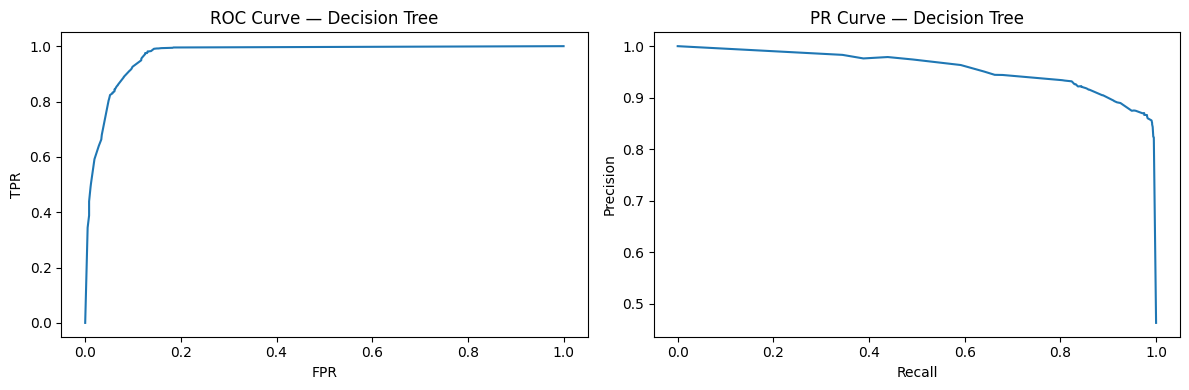

In [53]:
evaluate(dt, X_test_clean, y_test, "Decision Tree")


Random Forest Evaluation
Precision: 0.9338
Recall:    0.9846
F1 Score:  0.9585
ROC-AUC:   0.9913
PR-AUC:    0.9876

Confusion Matrix:
[[922  59]
 [ 13 832]]

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       981
           1       0.93      0.98      0.96       845

    accuracy                           0.96      1826
   macro avg       0.96      0.96      0.96      1826
weighted avg       0.96      0.96      0.96      1826



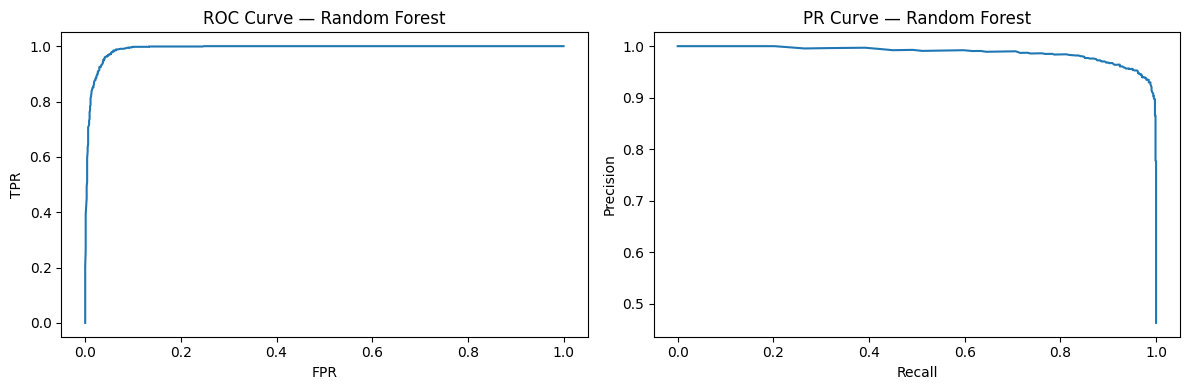

In [54]:
evaluate(rf, X_test_clean, y_test, "Random Forest")


SVM Evaluation
Precision: 0.8672
Recall:    0.9349
F1 Score:  0.8998
ROC-AUC:   0.9666
PR-AUC:    0.9535

Confusion Matrix:
[[860 121]
 [ 55 790]]

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       981
           1       0.87      0.93      0.90       845

    accuracy                           0.90      1826
   macro avg       0.90      0.91      0.90      1826
weighted avg       0.91      0.90      0.90      1826



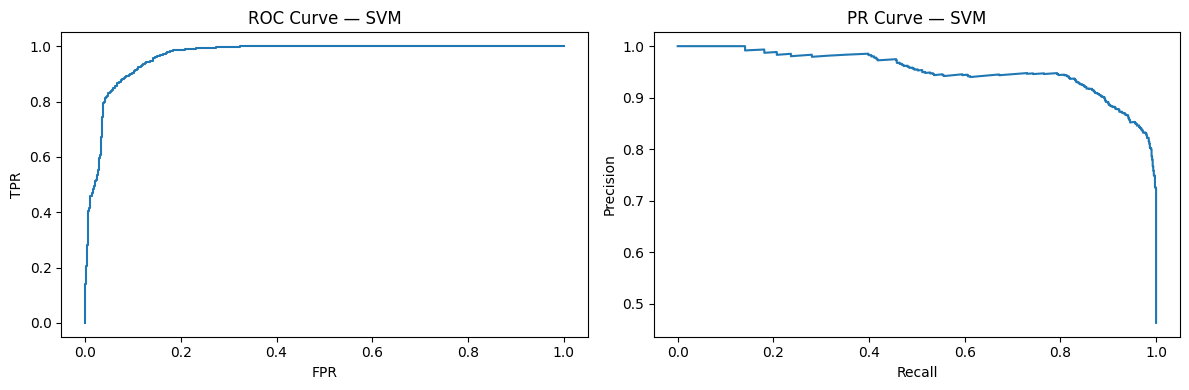

In [55]:
evaluate(svm, X_test_clean, y_test, "SVM")


Gradient Boosting Evaluation
Precision: 0.9283
Recall:    0.9799
F1 Score:  0.9534
ROC-AUC:   0.9870
PR-AUC:    0.9807

Confusion Matrix:
[[917  64]
 [ 17 828]]

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       981
           1       0.93      0.98      0.95       845

    accuracy                           0.96      1826
   macro avg       0.96      0.96      0.96      1826
weighted avg       0.96      0.96      0.96      1826



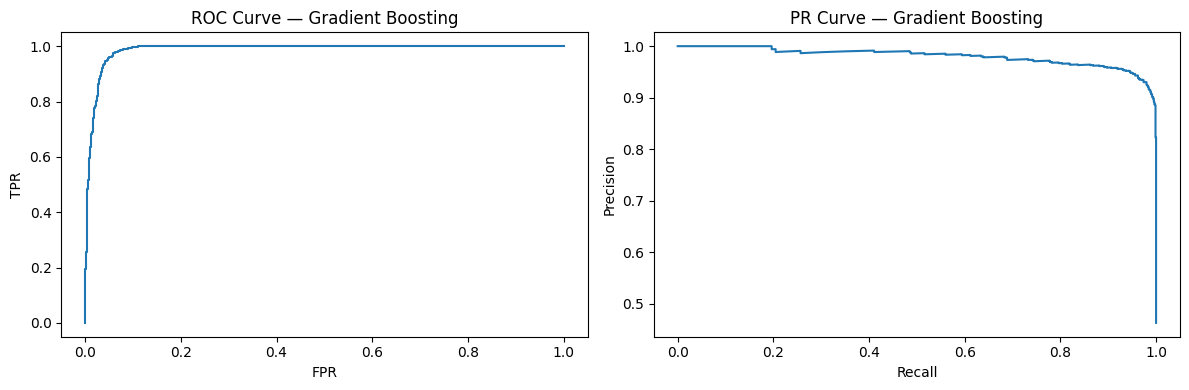

In [56]:
evaluate(gb, X_test_clean, y_test, "Gradient Boosting")

In [ ]:
# Summary Report for All 5 Models

def generate_report(models_dict, X_test, y_test):
    """Generate a comparison report for multiple models."""
    results = []
    
    for name, model in models_dict.items():
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        results.append({
            "Model": name,
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_prob),
            "PR-AUC": average_precision_score(y_test, y_prob)
        })
    
    return pd.DataFrame(results).round(4)

#all 5 models
report_models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "Gradient Boosting": gb
}

print("=" * 60)
print("MODEL COMPARISON REPORT (All 5 Models)")
print("=" * 60)
report_df = generate_report(report_models, X_test_clean, y_test)
display(report_df)

MODEL COMPARISON REPORT (All 5 Models)


MODEL COMPARISON REPORT (All 5 Models)


,Model,Precision,Recall,F1 Score,ROC-AUC,PR-AUC
0,Logistic Regression,0.4000,0.8713,0.5483,0.9533,0.7478
1,Decision Tree,0.3901,0.8614,0.5370,0.9036,0.6567
2,Random Forest,0.7397,0.5347,0.6207,0.9440,0.7249
3,SVM,0.3955,0.8614,0.5421,0.9286,0.5383
4,Gradient Boosting,0.7215,0.5644,0.6333,0.9536,0.7501


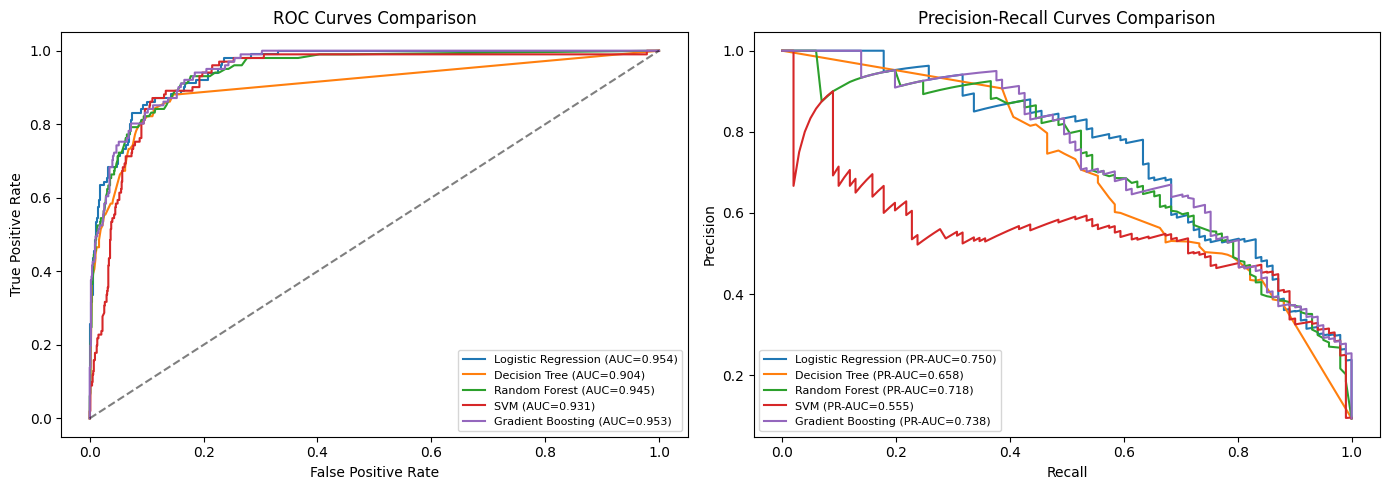

In [22]:
# ROC and PR Curves Comparison

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for name, model in report_models.items():
    y_prob = model.predict_proba(X_test_clean)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right", fontsize=8)

plt.subplot(1, 2, 2)
for name, model in report_models.items():
    y_prob = model.predict_proba(X_test_clean)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.plot(rec, prec, label=f"{name} (PR-AUC={pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Comparison")
plt.legend(loc="lower left", fontsize=8)

plt.tight_layout()
plt.show()